# HOTEL BOOKING CANCELLATION TENDENCY 
## BASE MODEL
### Using Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, and Random Forest
#### Notebook 1 of 2

[![hotel](https://www.journeyera.com/wp-content/uploads/2022/01/luxury-5-star-hotels-kathmandu-thamel-251085752.jpg)](https://www.journeyera.com/wp-content/uploads/2022/01/luxury-5-star-hotels-kathmandu-thamel-251085752.jpg)

## Project Instruction

As per Capstone Project Module 3 Guideline instructed by project organizer (Purwadhika Digital Technology School), this capstone project aims student to be able to make data analysis and build a Machine Learning Model in accordance with data and requirement. Obviously, every student must perform this project by end-to-end, covering problem statement, target / goals, model limitation, up to summary and recommendation in regards with the project done.

## Project Background

We act as newly hired In-House Data Scientist at a 5-stars Hotel. Our responsibilities is to `predict tendency` of a customer with certain features will cancel their bookings at our hotel or not. Before appointed us, the Hotel often suffer revenue loss from customer suddenly cancel their room bookings which left the rooms vacant and can not be occupied by other customers.

According to Forbes in 2014[[1]](#1), every day in the United States alone, more than 221,000 hotel rooms are cancelled and paid for, resulting in a market which sees $8.6 million wasted annually on non-refundable hotel room cancellations. An online travel marketplace for non-refundable hotel reservation, Roomer, as reported by Forbes, stated that hotel room cancellations hurt the entire value chain of the travel industry: the customer paying the cancellation fees, the travel agent losing his/her commission, and the hotel that is losing potential 30% extra income in Food & Beverage and Amenity purchases from the hotel guest. Industry and academia pointed out that this trend of hotel reservation cancellations and no-shows is troublesome because it is causing significant financial losses (Duetto, 2016; Pederson, 2018)[[2]](#2).

Other case that causes this domino-effect to be happening is the *cancelling re-booking scheme*. As illustrated by Bonnie Clay in ideas.com[[3]](#3), a guest named Jamie (*pseudonym* - not real name) booked a **fully flexible reservation** at your hotel for a future trip. Before continuing this illustration, hotel cancellation policy usually comes in 2 options, refundable and non refundable as written on tiket.com[[4]](#4)
- Non-refundable means the reservation is not possible for any kind of refunds. If customer ended up to cancel their reservation, no amount of money will be returned as refund by the hotel.
- Refundable/Free-Cancellation means the reservation is available to be cancelled and any payment done will be returned back to the customer. However in the practice, refundable scheme could be in many forms, as reported by roomertravel.com[[5]](#5) :
    - The “cancel by certain date” policy -> cancel hotel reservations free of charge up until a certain date. Once this date passes, hotel cancellation policies can either be standard cancellation fee or full payment.
    - The “one night penalty” policy -> hotel charges a cancellation fee equivalent to one night’s stay at the hotel.

Continuing the illustration, Jamie booked a fully flexible reservation at your hotel for a future trip. Every once in a while, Jamie gets bored at work, thinks about his upcoming vacation and continues to surf hotel and travel rates online—checking both your website and comprehensive metasearch sites—just in case he spots a better deal.

Implication of the scenario are:
1. What Jamie’s going to do if he sees a lower rate offered over the dates of his future stay?
- **Answer:** Jamie will cancel reservation he made and then re-booked for the same property at lower price.

2. Jamie gradually checking hotel price for better deal, what's the implication to the hotel?
- **Answer:**  If every click of the button captured as a new unit of hotel demand to the hotel's website algorithm, there will be inflation to hotel's price as usually hotel implemented machine learning to automatically set room price based on the demand of the property (inflation in price, bias of hotel's demand forecast-analysis)

## What We Offer

We will build Machine Learning model to predict whether a customer have a tendency to cancel their bookings or not. By studying the historical data of past customers, we train Model to learn about underlying characteristics of customer that actually cancel their booking and customer who completed their bookings. If the Machine detected that a customer have high tendency to cancel their bookings in the future, we will abort their booking process and redirect them to our website's homepage. We obviously hope that our Model could predict and classify customers by their features precisely as what they will actually done in the future (cancel or not), but our Model also come with possibility of falsely predicted the outcome. This could be explained with Confusion Matrix below:

Actual/Prediction | 1 (Predicted Cancel) | 0 (Predicted Not_Cancel)
-----|-----|-----
1 (Actual Cancel)|True-Positive|`False-Negative`
0 (Actual Not_Cancel)|`False-Positive`|True-Negative

Interpretation:
1. True-Positive : We predict that customer will cancel their bookings and in actual they did cancel their bookings
    - Impact: We could maximalize our profit by filling our room entirely, as well as gaining extra profit from F&B service.
2. `False-Negative` : We predict that customer will not cancel their bookings and in actual they did cancel their bookings
    - Impact: We will lose productivity of our hotel staffs to giving service on customer who will ended up not staying in our hotel. Further, room which customer cancelled will remain vacant and hotel will losing profit on this room * number of nights, while actually we could fill it up with other customers.
3. `False-Positive` : We predict that customer will cancel their bookings and in actual they did not cancel their bookings
    - Impact: We will lose customers (presumably new long-term customers), but if our hotel is full-packed there should be no burden on hotel's profitability since no hotel room remain vacant as result of this case.
4. True-Negative : We predict that customer will not cancel their bookings and in actual they did not cancel their bookings
    - Impact: Normal hotel bookings scheme.

We will explained thoroughly when we analyze about the target column in our dataset in the end of Chapter 1 of this project. To summarize, customers' behavior on 'cancel and re-booked' room in our hotel is bringing Domino effect not only to themself if they have to lose certain money of their payment (for bookings under Refundable scheme), but also to the hotel because of vacant room and reduce in F&B income, including other customers in the waiting list (in case of fully booked hotel) and general customer that experiencing price inflation since hotel's room price algorithm will detect this condition as high-demand and ended up increasing the room's price.

## Goals

As mentioned on Confusion Matrix above, our goals is to reduce number of False-Negative cases (model predicted customers will not cancel but in actual they will) as low as possible to avoid revenue loss from vacant room and unreliable demand projection of our hotel's forecast.

## Project Limitation - Start of Project

We obtain the dataset for this project directly from project organizer, Purwadhika Digital Technology School. As explained by the project organizer, this dataset has been set purposely for this project only, while details like hotel name, time period, location, hotel location, hotel occupation rate, price rate are not disclosed. Therefore, the outcome of this project will be very limited and may not be suitable for many cases, however this project aim to produce the basic Machine Learning process to make prediction about customer's tendency to make cancellation or not. We will also summarized project limitation at the end of the project after we perform Data Understanding to each features available in the dataset.

## Project Overview

1. **PROBLEM STATEMENT** : How can we predict and minimalized cancellations by customers so that we can reduce opportunity cost from vacant rooms and extra income from Foods and Beverages, as well as improving the reliability of demand forecast of our hotel rooms ? 

2. **DATA** : In this project, we would like to predict risk of booking cancellations by customers. Cancellation risk could be predicted using demographic information from historical data of past customers, as well as booking details requested on each cancelled bookings so that we could assessed pattern of customers who likely to cancelled their bookings.

3. **MACHINE LEARNING OBJECTIVE** : To MINIMALIZED opportunity cost arise from bookings cancellation, that could be in form of:
    - Expected Profit per Room - Unrefundable Deposit
    - Additional income from F&B service as well as tips for hotel staffs (reception, bellboy and valet)
    - Unreliability of demand forecast as customers who had made bookings kept on searching for lowest price and then caused cancel-then-rebook phenomenon.
    - Price inflation because Hotel's website detected particular rooms had high demand from this cancel-then-rebook practice, which could cause market position of the hotel could shifted into higher market. Even though the higher price of the rooms in a fully-booked hotel could means that Hotel gained extra profit than they targeted, customer will have higher expectation to the services since they have paid high price for a room, which in actual could be overwhelmed to hotel's staff that did not usually performed service in high level.

4. **ACTION** : To not letting/reject customers who had high tendency (example: more than 50% possibility) to cancel their bookings in the future, to book a room at our hotel.

5. **VALUE** : Purpose of using Machine Learning is to reduce OPPORTUNITY COST (income that should have had been produced if customers did not cancel their bookings) and turn it into ACTUAL INCOME.

## MAIN QUESTION : WHY PROBLEM MUST BE SOLVED WITH MACHINE LEARNING
Illustration : 
- [![water](https://blueskyplumbingfl.com/wp-content/uploads/2016/10/leaky-faucet-blog.jpg)](https://blueskyplumbingfl.com/wp-content/uploads/2016/10/leaky-faucet-blog.jpg)

Without implementation of machine learning, hotel will treat this cancelled room and vacant rooms as small or insignificant loss to their entire Statement of Profit / Loss. The hotel staff will not bothered by this too, as vacant rooms means there are less customers to be served, less service to be given, less room need to be cleaned. We illustrated this situation as small leakage in a faucet, if a drop of water (0.05 mL)[[6]](#6) leaked from a faucet every 5 seconds, it means we have lost a total of 86,400 (total seconds in a day) / 5 * 0.05 mL = **864 mL** of water in a day. It is equivalent to **3,153.6 litres** of water in a year or **31,536** litres of water in 10 years. 

This drop of water leakage or profit in terms of hotel cancellation are the Opportunity Cost instead of simply Expenses or Loss that could be seen in Statement of Profit or Loss in Company's financial statements. Opportunity cost is cost borned by an entity for not taking particular choices for another alternative. As this is only a **potential benefit**, management tends to bat their eye as without this extra income, hotel are still very healthy financially. However as this practice keeps on happening, hotel could lose huge potential benefit in long terms, include if there's a circumstances where hotel need to get used a little profit as possible to help their business running, for example when Covid-19 hits and hospitality service is the first one getting hit hard by the pandemic. Without Machine Learning, hotel could only review their cancellation policies and apply very high unrefundable deposit rate or maybe change their cancellation policies as totally unrefundable to avoid losing income from cancellations. However, this is not nearly a solution since the root cause of the problem is hotel letting the customer that has high potential to cancel their bookings in the end to still making reservation in our hotel.

With the implementation of machine learning, the hotel could have a very stable income _(room type * rate * number of rooms)_ and did not need to allocate huge time from their staffs to serve for customers who would like to cancel their bookings. This could also give potential customer (customer who still search for a bookings in our hotel) or customer in waiting list understanding that, there is only a very small chance someone would give up their room since we had filter them out with Machine Learning from the very first time they book in our hotel. Our demand forecast with data from total clicks from our website or travel agent site will also gain boost in their reliability and credibility, since we have eliminate customer who still searching for lower price or possibility of someone cancel their bookings. 

## Economic Implications

Economic implication for the implementation of Machine Learning are:
- Income: 
    1. Dohop : Some 19% of hotels that are booked online are cancelled before the guest arrives at the hotel[[7]](#7)
        - Since our hotel had waiting list customers waiting for cancellation bookings, we assume half of them could be switched for customers in waiting list. **So 10% of rooms are vacant - 10% of potential income were lost**
        
    2. AirBnB : Moderate cancellation policy: Guests can cancel up to 5 days before check-in for a full refund, and you won’t be paid. If they cancel after that, you’ll be paid for each night they stay, plus 1 additional night and 50% for all unspent nights.[[8]](#8)
        - Since there are a lot of cancellation in our hotel, we assume hotel were using moderate cancellation policy. **Out of 10% vacant rooms, we receive 50% of unrefundable payment - 50% of potential loss were recovered**

    3. STR : Total food-and-beverage revenue per occupied room rose 1.6% to $105.56 in 2017, though in-room dining decreased 3% from 2016.[[9]](#9)
        - Since 10% of our rooms are vacant, potential benefit from F&B revenue are **10% of total rooms x USD 105.56**

    4. Although the average nightly price in North America is $884, the most common nightly price is between $500 and $750.[[10]](#10)
        - We use USD 884 as average cost per room per night.

    5. Statista : Average number of rooms in Luxury Hotel are around 300 rooms.[[11]](#11)

**TOTAL OPPORTUNITY COST TO BE RECOVERED AS INCOME WITH MACHINE LEARNING**
> ((10% * 300 rooms) * ( USD 884 + USD 105.56)) * 50% = USD 14,843.4 per day

    - Potential Additional Income per day: USD 14,843.4
    - Potential Additional Income per year: USD 5,417,841

- Cost:
    - We will build a Machine Learning Team in our hotel consist of 1 Machine Learning Manager, 1 Machine Learning Team Lead and 3 Machine Learning Engineers.
    1. Machine Learning Manager : USD 191,891/year (Glassdoor [[12]](#12))
    2. Machine Learning Team Leader : USD 136,969/year (Glassdoor [[13]](#13))
    3. Machine Learning Engineer : USD 100,310/year (Glassdoor [[14]](#14))

**TOTAL COST OF HIRING MACHINE LEARNING TEAM**
> (1 * USD 191,891) + (1 * USD 136,969) + (3 * USD 100,310) = USD 629,790 per year

**POTENTIAL BENEFIT**
- Potential Benefit per year = USD 4,788,051
- Potential Benefit per 10 years = USD 47,880,510


In [1]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Dataset
df=pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


We were given dataset by the project organizer (Purwadhika Digital Technology School), and the information in this dataset have been adjusted for the purpose of this project only. Dataset was given in .csv format and we have imported to this notebook as above. From this point, we will perform Data Understanding and Data Wrangling to understand more about the information in the dataset and preparing the information and format needed by Machine Learning model in the next stage of the project.

<hr>

## 1. Data Understanding and Data Wrangling

In [3]:
## Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


First thing first, we check the information of the columns in the dataset. There are 11 columns available, including our target column which is `is_cancelled` that given information whether the hotel room reservation is being cancelled or completed. In the non-null count column, we detected that `country` column has different number of non-null data than other column, therefore we detected that there will be missing value from our dataset. Meanwhile, from the 11 columns in the dataset, 5 of them are object-type while remainder are in integer. 

As missing value is expected, we ensure that missing value is present by visualizing the data in Heatmap below.

### 1.1 Visualize and Handle Missing Value

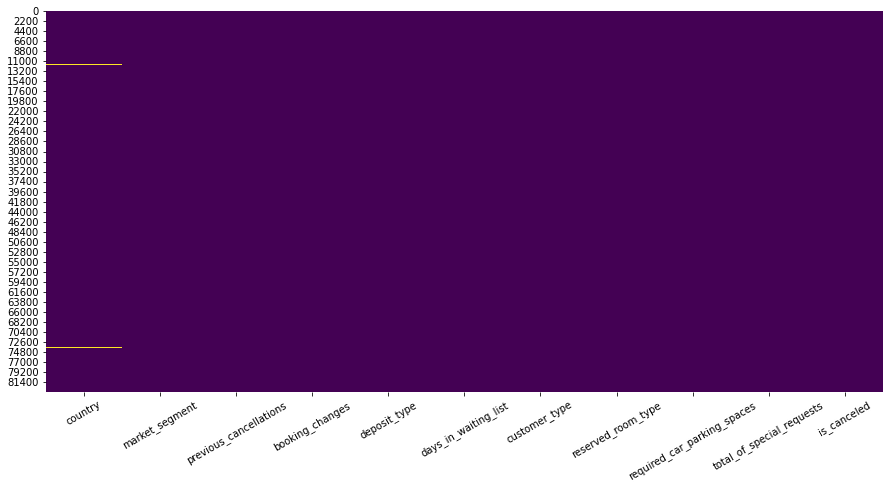

In [4]:
## Visualize Missing Value Using Heatmap
plt.figure(figsize=(15,7)) # set size of heatmap
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
# cmap = palette colour of the heatmap
# cbar=False -> to hide heatmap bar (legends) as we will not do analysis from this figure, we only want to detect missing value
plt.xticks(rotation=30) # set degree rotation of the x-axis labels for visualization purposes
plt.show()
## Result: missing value detected in columns country only (yellow colour represent missing value)

In [5]:
## Show Number of Missing Value and Proportion to Dataset
print('Number of missing value in Country column : ', df['country'].isna().sum())
print('Proportion of missing value (%) : ', ((df['country'].isna().sum() / len(df)) *100).round(2))

Number of missing value in Country column :  351
Proportion of missing value (%) :  0.42


Number of missing value in `country` column are only 351 data, equivalent to 0.42% to total number of rows/data in our dataset. Even though this number of data is insignificant to our dataset and analysis further, we decided to keep this information by filling the missing value with 'Other' value.

In [6]:
# Handling Missing Value - Fill in missing data with 'Other'
## There should be no customer without being a member of a country, therefore we fill in with 'Other'
df['country'] = df['country'].fillna('Other')

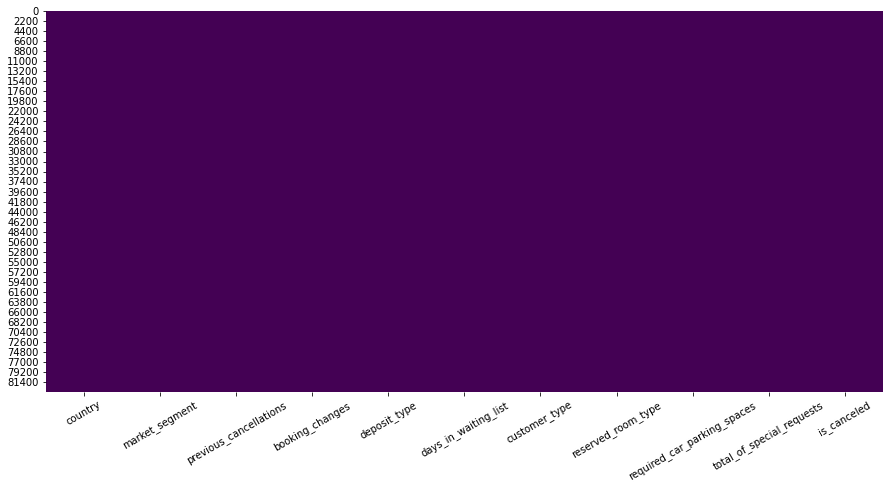

In [7]:
## Confirm Elimination of Missing Value
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.xticks(rotation=30)
plt.show()
## Result: No missing value left in our dataset

### 1.2 Check Duplicated Data

In [8]:
## Check if there duplicated data
df.duplicated().any()
## Result: There are duplicated data

True

In [9]:
## Combine duplicate data in a variable and show duplicate data
duplicates = df[df.duplicated() == True]
duplicates

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


There are 73,371 duplicated data in our dataset, however, there are no unique information (date/time or customer name/number) that could be used to distinguish one data to another. Therefore, we did not treat this duplicate data further as it is highly possible that this duplicate data could occur since there are no unique information to refer to.

### 1.3 Describe Columns and Perform Encoding for Categorical Columns

In [10]:
## Build For Loop to contain data for checking column details
hotelDesc=[]

for i in df.columns:
    hotelDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df))*100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
        ])

In [11]:
## Input data into DataFrame and show details of every column
pd.DataFrame(data=hotelDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'Null%',
                'Unique',
                'Sample'
            ])

,Features,DataType,Null,Null%,Unique,Sample
0,country,object,0,0.0,163,"[RWA, ECU]"
1,market_segment,object,0,0.0,8,"[Direct, Undefined]"
2,previous_cancellations,int64,0,0.0,15,"[21, 26]"
3,booking_changes,int64,0,0.0,19,"[8, 4]"
4,deposit_type,object,0,0.0,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,0,0.0,115,"[76, 113]"
6,customer_type,object,0,0.0,4,"[Transient-Party, Contract]"
7,reserved_room_type,object,0,0.0,10,"[A, E]"
8,required_car_parking_spaces,int64,0,0.0,5,"[2, 8]"
9,total_of_special_requests,int64,0,0.0,6,"[0, 1]"


From table above, we confirmed that no missing value detected in our dataset (for handling of missing value please refer to Activity 1.1). Our dataset is consist about information of every reservation made to the hotel, so each row of data consist of single reservation transaction from the information mainly about the customer including room and service request booked to the hotel. We will quickly define values and purpose of every columns below:

#### `FEATURES COLUMN`

#### 1.3.1. Country

In [12]:
df['country'].unique()
## Result: this column consist of country code of our customers.
## We could also confirm that 'Other' value as part of our missing value handling activity is succesfully implemented.

array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
       'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
       'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
       'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
       'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
       'ISR', 'Other', 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN',
       'PRY', 'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA',
       'ATA', 'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN',
       'VEN', 'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN',
       'BEN', 'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD',
       'MUS', 'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN',
       'MAC', 'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV',
       'SYR', 'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM',
       'LKA', 'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM',
       'DOM', 'KWT'

In [13]:
## Number of Unique Countries
df['country'].nunique()
## Result: Customers who made bookings on our website came from at least 162 countries.
### From this result, we can assume that hotel in our dataset serve international market and presumably a high-end and luxurious hotel. 

163

Since `country` column contain data in object type and have no order in the value, we will perform Re-Categorize to make several class to this column.

In [14]:
## Define proportion of top 10 reservation made by country codes 
(pd.crosstab(index=df['country'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
country,
PRT,40.80
GBR,10.16
FRA,8.74
ESP,7.17
DEU,6.12
ITA,3.18
IRL,2.80
BEL,1.97
BRA,1.86


From table above, bookings made by customer from PRT (Portugal) is substantially higher in proportion than any other countries, we divide them into transactions from Portugal and the rest of countries.

In [15]:
## Build function for Re-Categorize in `country` column
def country(x):
    if x == 'PRT':
        return x
    else:
        return 'Others'

In [16]:
## Apply Re-Categorize function
df['country'] = df['country'].apply(country)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['country'])
## Show Table after Encoding
df.head()
## Result: Original `country` column has been eliminated and encoding result appear at the end of DataFrame

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,1,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,0,1
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,1,0
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,0,1


#### 1.3.2. Market Segment

In [17]:
df['market_segment'].unique()
## Result: This column define customer segment by how they made their reservation to the hotel.
## Values varied by reservation made by offline with travel agent, online by travel agent, direct offline (walk-in), group reservation,
### business/purposes, bonus/complementary stay, aviation staff purposes and others.

array(['Offline TA/TO', 'Online TA', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

Since `country` column contain data in object type and have no order in the value, we will perform Re-Categorize to make several class to this column.

In [18]:
## Define reservation made by customers segmentation 
(pd.crosstab(index=df['market_segment'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
market_segment,
Online TA,47.22
Offline TA/TO,20.37
Groups,16.42
Direct,10.65
Corporate,4.54
Complementary,0.61
Aviation,0.20
Undefined,0.00


From table above, bookings made by customer from Online-by-Travel-Agent is substantially higher than any other segment, we divide them into transactions from Online with Travel Agent and the rest.

In [19]:
## Build function for Re-Categorize in `market_segment` column
def segment(x):
    if x == 'Online TA':
        return x
    else:
        return 'Others'

In [20]:
## Apply Re-Categorize function
df['market_segment'] = df['market_segment'].apply(segment)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['market_segment'])
## Show Table after Encoding
df.head()
## Result: Original `market_segment` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others
0,0,0,No Deposit,0,Transient-Party,A,0,0,0,1,0,0,1
1,0,0,No Deposit,0,Transient,A,0,2,0,1,0,1,0
2,0,1,No Deposit,0,Transient,A,0,2,0,0,1,1,0
3,0,0,No Deposit,0,Transient,A,0,1,1,1,0,1,0
4,0,2,No Deposit,0,Transient,A,0,2,0,0,1,1,0


#### 1.3.3. Previous Cancellations

In [21]:
df['previous_cancellations'].unique()
## Result: This column define whether particular customers ever made any cancellations for their bookings before.
## Since this column is already in integer type, we did not perform encoding to this column

array([ 0,  1, 25,  2,  3, 11, 24, 13,  6, 26, 14,  4, 19,  5, 21],
      dtype=int64)

#### 1.3.4. Booking Changes

In [22]:
df['booking_changes'].unique()
## Result: This column define whether there is any changes made to the reservation.
## Since this column is already in integer type, we did not perform encoding to this column

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9,  8, 17, 10, 13, 12, 14, 21, 16,
       20, 15], dtype=int64)

#### 1.3.5 Deposit Type

In [23]:
df['deposit_type'].unique()
## Result: This column define deposit type for every bookings.

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

Since `deposit_type` column contain data in object type, have only 3 type of values and have no order in the value, we will directly perform One-Hot Encoding to this column.

In [24]:
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['deposit_type'])
## Show Table after Encoding
df.head()
## Result: Original `deposit_type` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,Transient-Party,A,0,0,0,1,0,0,1,1,0,0
1,0,0,0,Transient,A,0,2,0,1,0,1,0,1,0,0
2,0,1,0,Transient,A,0,2,0,0,1,1,0,1,0,0
3,0,0,0,Transient,A,0,1,1,1,0,1,0,1,0,0
4,0,2,0,Transient,A,0,2,0,0,1,1,0,1,0,0


#### 1.3.6. Days in Waiting List

In [25]:
df['days_in_waiting_list'].unique()
## Result: This column define days of customers in waiting list before giving chance for reservation.
## Since this column is already in integer type, we did not perform encoding to this column

array([  0,   3,  39,  87,  77, 215,  97, 162,  46,  79,   4,  31, 122,
        34,  57, 259,  50,  17,  32,  43,  75,  69,  44,  22, 113,  58,
        38,  65,  48, 236, 176,  25, 108,  91,  19, 160,  68,  28,  63,
        35,  42,  59,  24,   8, 183, 187,  21, 111,  56,  98, 101,  15,
        16,  47,  93,  45,  14,  70,  10,  49, 178,  99,  60,  40,  85,
       223,   6,  33, 391,  20,   1,  41, 147,  55,  80, 379, 150,  61,
       330, 174, 107,  96,  18,  62,  13,  30, 120,  27, 207,  71,   2,
        76, 125,   5,   9, 224,  53,  83,  84,  12,  73, 100,  92,  23,
        11, 105,  26, 193,   7, 165,  74, 121,  36,  64, 185], dtype=int64)

#### 1.3.7. Customer Type

In [26]:
df['customer_type'].unique()
## Result: This column define type of customers whether made for personal/single room (Transient) or in group.

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

Since `customer_type` column contain data in object type, only have 4 values and have no order in the value, we will directly perform One-Hot Encoding to this column.

In [27]:
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['customer_type'])
## Show Table after Encoding
df.head()
## Result: Original `customer_type` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,A,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,A,0,2,0,1,0,1,0,1,0,0,0,0,1,0
2,0,1,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0
3,0,0,0,A,0,1,1,1,0,1,0,1,0,0,0,0,1,0
4,0,2,0,A,0,2,0,0,1,1,0,1,0,0,0,0,1,0


#### 1.3.8. Reserved Room Type

In [28]:
df['reserved_room_type'].unique()
## Result: This column define room type of each bookings.

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

Ideally, room type would be divided into several class, and each class would have different facilities, size and services and therefore have different rate for each room type. However, since we did not have information about what every of this class differentiate to the others, we will treat them as they have no order in the value, and we will perform Re-Categorize to make several class to this column.

In [29]:
## Define reservation made by room type 
(pd.crosstab(index=df['reserved_room_type'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
reserved_room_type,
A,71.84
D,16.18
E,5.56
F,2.44
G,1.73
B,0.94
C,0.81
H,0.48
P,0.01


From table above, bookings made by customer for room type A is substantially higher than any other room types, we divide them into bookings for room type A and the rest.

In [30]:
## Build function for Re-Categorize in `reserved_room_type` column
def room_type(x):
    if x == 'A':
        return x
    else:
        return 'Others'

In [31]:
## Apply Re-Categorize function
df['reserved_room_type'] = df['reserved_room_type'].apply(room_type)
## Directly perform One-Hot Encoding
df = pd.get_dummies(df, columns=['reserved_room_type'])
## Show Table after Encoding
df.head()
## Result: Original `reserved_room_type` column has been eliminated and encoding result appear at the end of DataFrame

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


#### 1.3.9. Required Car Parking Space

In [32]:
df['required_car_parking_spaces'].unique()
## Result: This column define number of parking spaces requested by every customer in each bookings.
## Since this column is already in integer type, we did not perform encoding to this column

array([0, 1, 2, 8, 3], dtype=int64)

#### 1.3.10. Total of Special Requests

In [33]:
df['total_of_special_requests'].unique()
## Result: This column define number of special order requested by every customer in each bookings.
## Since this column is already in integer type, we did not perform encoding to this column

array([0, 2, 1, 3, 4, 5], dtype=int64)

From all 10 features columns, we did not detected any column/feature that have direct impact to whether customer will or will not cancel their bookings.

#### `TARGET COLUMN`

In [34]:
df['is_canceled'].unique()
## Result: This column define whether customer cancel their bookings or not.
## 0 = Not Cancelled
## 1 = Cancelled

array([0, 1], dtype=int64)

#### Sample Confusion Matrix

Actual/Prediction | 1 (Predicted Cancel) | 0 (Predicted Not_Cancel)
-----|-----|-----
1 (Actual Cancel)|True-Positive|False-Negative
0 (Actual Not_Cancel)|`False-Positive`|True-Negative

Interpretation:
1. True-Positive : We predict that customer will cancel their bookings and in actual they did cancel their bookings
2. False-Negative : We predict that customer will not cancel their bookings and in actual they did cancel their bookings
    - Impact: We will lose productivity of our hotel staffs to giving service on customer who will ended up not staying in our hotel. Further, room which customer cancelled will remain vacant and hotel will losing profit on this room * number of nights, while actually we could fill it up with other customers.
3. False-Positive : We predict that customer will cancel their bookings and in actual they did not cancel their bookings
    - Impact: We will lose customers (presumably new long-term customers), but if our hotel is full-packed there should be no burden on hotel's profitability since no hotel room remain vacant as result of this case.
4. True-Negative : We predict that customer will not cancel their bookings and in actual they did not cancel their bookings

**GOALS** : Our goals in this project is to reduce False-Negative, as every case occur in False-Negative will resulted in waste of time and energy of our Hotel staff and losing of revenue for the respective room. Therefore, we will focus on Recall(+) and Precision(-) score for our evaluation metrics.

\begin{equation}
Recall (+) = \frac{(True-Positive)} {(True-Positive) + (False-Negative)}
\end{equation}

From the equation above, Recall(+) will go change in opposite of the False-Negative, because False-Negative in this equation act as the denominator. So, as our **GOALS** want to tackle False-Negative cases dan push down False-Negative as low as possible, Recall(+) score will go up. In other words, the highest Recall(+) is the result of decrease in False-Negative cases, therefore we will focus on **finding Model that produce the highest Recall(+) score**.

Besides Recall(+), we could refer to Precision(-) score as well.

\begin{equation}
Precision (-) = \frac{(True-Negative)} {(True-Negative) + (False-Negative)}
\end{equation}

From Precision(-) equation above, the score is determine by False-Negative case to in the opposite way to the Precision(-) score. The higher the False-Negative cases appear, Precision(-) would go up and acted exactly as Recall(+) score.

#### 1.3.11 Check for Data Imbalance
We want to check whether one of the value in target column has significantly bigger proportion than other value. If there is value with proportion higher than 75%, we would categorize this dataset as imbalance. Imbalance data will impact Model to learn more about Majority Class (class with proportion above 75%) and have poor ability to predict data in Minority Class (class with proportion below 25%). Since data imbalance could be determine by the proportion, we check proportion of 0 (no cancel) and 1 (cancel) value from our target column below.

In [35]:
## Check proportion of values in target
df['is_canceled'].value_counts()
## Result: Imbalanced of values in target column not detected

0    52795
1    30778
Name: is_canceled, dtype: int64

In [36]:
## Check proportion in percentage
(pd.crosstab(index=df['is_canceled'],columns='Proportion (%)',normalize=True)*100).round(2)
## Result: Imbalanced confirmed

col_0,Proportion (%)
is_canceled,
0,63.17
1,36.83


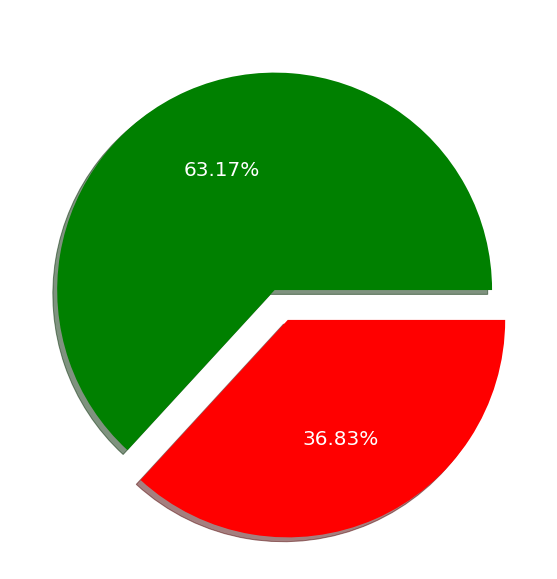

In [37]:
## Visualize with Pie Plot
plt.figure(figsize=(10,10))
plt.pie(df['is_canceled'].value_counts(),labels=['No Cancel (0)','Cancel (1)'],
    colors=['g','r'],
    shadow=True,
    textprops={
        'size':20,
        'color':'w'
    },
    autopct='%1.2f%%',
    explode=(0.05,0.1))
plt.title('Proportion of Values in Target Column',color='w',size=20)
plt.show()

Since our data is not categorized as imbalanced data as neither of values in target column has proportion more than 75%, then we do not perform handling procedure for imbalance data.

### 1.4 DataFrame after Data Understanding and Data Wrangling

In [38]:
## Show updated DataFrame
df.head(5)

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,country_Others,country_PRT,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,1,0


### 1.5 Feature Selection

#### 1.5.1 Quick EDA with Domain Knowledge

In [39]:
## 1. Impact of Previous Cancellation to Cancellation Status
pd.crosstab(index=df['previous_cancellations'], columns=df['is_canceled'])

is_canceled,0,1
previous_cancellations,,
0,52410,26650
1,238,3969
2,59,27
3,30,16
4,16,3
5,7,0
6,13,6
11,21,7
13,1,9


Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by customers. As we could see from the table above, most of customers that ends up not cancelling their bookings were never cancelled a bookings before. Meanwhile, transactions that getting cancelled mostly made by customers who never cancelled and at least done 1 bookings cancellations to their bookings before. Therefore, customers who ever made bookings cancellation have tendency to make another cancellations in the future.
> There is impact of `previous_cancellations` towards a booking getting cancelled or not

In [40]:
## 2. Impact of Booking Changes to Cancellation Status
pd.crosstab(index=df['booking_changes'], columns=df['is_canceled'])

is_canceled,0,1
booking_changes,,
0,42073,28800
1,7676,1287
2,2129,523
3,547,92
4,217,43
5,76,14
6,27,12
7,22,1
8,6,4


Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by customers. As we could see from the table above, most of customers that ends up not cancelling their bookings have made bookings changes before. Meanwhile, transactions that getting cancelled mostly made by customers who rarely make changes to their bookings before. Therefore, customers who usually made bookings changes have tendency to not cancel their bookings in the future.
> There is impact of `booking_changes` towards a booking getting cancelled or not

In [41]:
## 3. Impact of Days in Waiting List to Cancellation Status
pd.crosstab(index=df['days_in_waiting_list'], columns=df['is_canceled']).head(10)

is_canceled,0,1
days_in_waiting_list,,
0,51871,29117
1,5,2
2,2,0
3,0,41
4,14,6
5,2,3
6,13,0
7,0,1
8,2,1


In [42]:
pd.crosstab(index=df['days_in_waiting_list'], columns=df['is_canceled']).tail(10)

is_canceled,0,1
days_in_waiting_list,,
193,0,1
207,8,5
215,6,11
223,27,18
224,4,2
236,20,3
259,8,0
330,8,0
379,5,5


Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by customers. As we could see from the table above, the pattern is unclear whether a customer with short time waiting for a room or a customer who have wait for almost a year finally going to cancel their bookings or not. However, theoritically if a person have waited for a long time before getting a room, they build a tendency to not cancelling their reservation since they have waited a long time for the opportunity to stay at the hotel. If in the meantime they are not longer attracted to the room anymore, they should have ended up cancelled their queue in the waiting list rather than cancelled their bookings after they were given the chance to book one.
> There is impact of `days_in_waiting_list` towards a booking getting cancelled or not

In [43]:
## 4. Impact of Parking Space Needs to Cancellation Status
pd.crosstab(index=df['required_car_parking_spaces'], columns=df['is_canceled'])

is_canceled,0,1
required_car_parking_spaces,,
0,47568,30778
1,5202,0
2,22,0
3,1,0
8,2,0


Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by customers. As we could see from the table above, it's obvious that customer who required car parking spaces as part of their reservation tends to not cancel their bookings and there is no customer who cancel their bookings requested for parking space to the hotel staff.
> There is impact of `required_car_parking_spaces` towards a booking getting cancelled or not

In [44]:
## 5. Impact of Number of Special Requests to Cancellation Status
pd.crosstab(index=df['total_of_special_requests'], columns=df['is_canceled'])

is_canceled,0,1
total_of_special_requests,,
0,25819,23369
1,18108,5106
2,7153,1967
3,1477,307
4,208,28
5,30,1


Column 0 indicates bookings that not getting cancelled by customers, while Column 1 means bookings getting cancelled by customers. As we could see from the table above, customer that retained their bookings tends to request for any special requests to the hotel than customer who cancel. This is inline with number of parking space requested above.
> There is impact of `total_of_special_requests` towards a booking getting cancelled or not

#### Domain Knowledge for Encoded Features
1. `Country` : customers for certain countries should have higher tendencies to cancel their bookings, in regards of visa process for citizen in certain countries to country where hotel situated.
2. `Market Segment` : customers' segment should be highly correlated into cancellation status since customer who booked online is more convenient to cancel and re-booked than walk-in customers.
3. `Deposit Type` : bookings made with refundable condition should have higher tendencies to be cancelled then bookings made under non-refundable terms.
4. `Customer Type` : customers who made bookings for group will have substantially lower tendency to cancel their bookings since travel planning for customers travel in group must be more certain than individual tour.
5. `Room Type` : customers who made bookings for cheaper room should have higher tendency to get cancelled since customers in this level will searched for lowest price possible, so if it's a promotion to their room, they will cancel their former bookings to book for room with discounted rate.

#### 1.5.2 Association Scoring

In performing feature selection with Correlation and/or Associations, there are several points to be noted:
- When performing Feature Selection, pay attention to entire Correlation score, not only features to target but also features to features
- Take notes on number of features, if total number of features are low, use them regardless of the correlation score
- If correlation is high (>0.8) between features and target, perform EDA based on Domain Knowledge whether feature has direct impact to the target or not.
    - if Yes, drop column/feature regardless of the high correlation score
- If correlation is high (>0.8) between 2 or more features, drop either one to prevent Multicollinearity (few columns/features have same purpose/function), as well as for computation efficiency
- Choosing threshold must consider overall correlation score between Features - Target, if the highest of them all is 0.4 and there's only 1 feature, do not use that threshold but consider to lower them to certain number.

We use `Association` as metrics to determine the level of correlation between features and target since `Correlation Ratio` only suitable for Categoric to Numeric columns (all of our feature columns are numerical, categorical features have all been encoded before). For association, we use Theil's U rather than Cramer's V since Cramer's V has possibility to produce bias.

In [45]:
## Import Dython Package for Correlation Ratio Scoring
import dython as dy
from dython.nominal import associations

In [46]:
## Check Data Types of Each Column
df.dtypes
## Our features consist of data in integer and categorical type.

previous_cancellations           int64
booking_changes                  int64
days_in_waiting_list             int64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
country_Others                   uint8
country_PRT                      uint8
market_segment_Online TA         uint8
market_segment_Others            uint8
deposit_type_No Deposit          uint8
deposit_type_Non Refund          uint8
deposit_type_Refundable          uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
reserved_room_type_A             uint8
reserved_room_type_Others        uint8
dtype: object

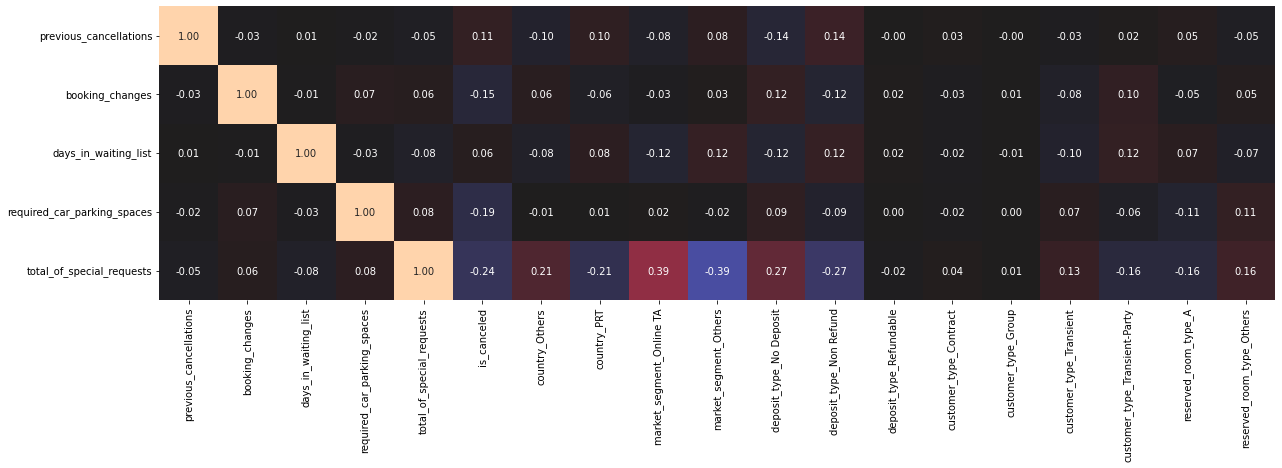

{'corr':                              previous_cancellations  booking_changes  \
 previous_cancellations                     1.000000        -0.027361   
 booking_changes                           -0.027361         1.000000   
 days_in_waiting_list                       0.006895        -0.010687   
 required_car_parking_spaces               -0.018208         0.068508   
 total_of_special_requests                 -0.048026         0.055748   
 
                              days_in_waiting_list  \
 previous_cancellations                   0.006895   
 booking_changes                         -0.010687   
 days_in_waiting_list                     1.000000   
 required_car_parking_spaces             -0.030333   
 total_of_special_requests               -0.083275   
 
                              required_car_parking_spaces  \
 previous_cancellations                         -0.018208   
 booking_changes                                 0.068508   
 days_in_waiting_list                      

In [47]:
## Association Score Heatmap Using Dython (Features-Features and Features-Target)
associations(df, figsize=(20,10), cbar=False, nom_nom_assoc='theil', display_rows=['previous_cancellations',
                                                                                    'booking_changes',
                                                                                    'days_in_waiting_list',
                                                                                    'required_car_parking_spaces',
                                                                                    'total_of_special_requests'])
# We excluded columns from encoded columns
## No multicollinearity issues detected (high associations between features)

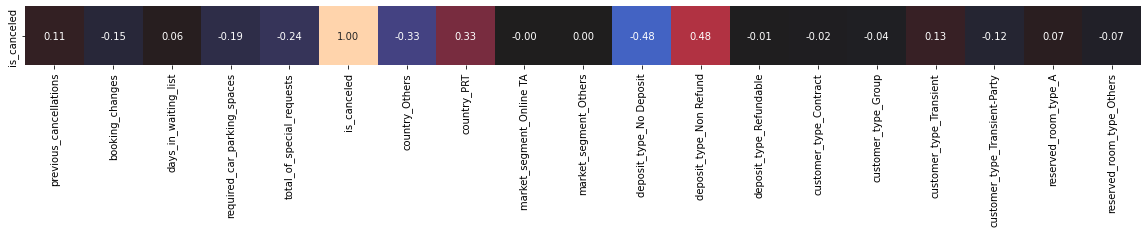

{'corr':              previous_cancellations  booking_changes  days_in_waiting_list  \
 is_canceled                0.109598        -0.145746              0.056203   
 
              required_car_parking_spaces  total_of_special_requests  \
 is_canceled                    -0.194807                  -0.235993   
 
              is_canceled  country_Others  country_PRT  \
 is_canceled          1.0       -0.333142     0.333142   
 
              market_segment_Online TA  market_segment_Others  \
 is_canceled                  -0.00493                0.00493   
 
              deposit_type_No Deposit  deposit_type_Non Refund  \
 is_canceled                -0.477539                 0.481102   
 
              deposit_type_Refundable  customer_type_Contract  \
 is_canceled                -0.011981               -0.023979   
 
              customer_type_Group  customer_type_Transient  \
 is_canceled            -0.040125                 0.129772   
 
              customer_type_Transient-Party 

In [48]:
## Association Score Heatmap Using Dython (Features-Target)
associations(df, figsize=(20,10), cbar=False, nom_nom_assoc='theil', display_rows=['is_canceled'])

- We did not detected any multicollinearity cases (two or more features giving or telling the same values).
- Even though association score between features to target are very low, we still include all columns as features as number of features are limited and elimination of features will only make Model more unreliable.
- From the result performed under Explanatory Data Analysis (EDA) above, we have analyzed that all features have impact to the target.

<hr>

## 2. Machine Learning Modelling

We will start our Machine Learning Modelling by implementing the most simple Model (Base Model) without any parameter tuning. 

### 2.1 Splitting Data

In [49]:
## Define features and target
x=df.drop(columns='is_canceled') ## all columns exclude target column
y=df['is_canceled'] ## target column

In [50]:
## Import Package for splitting data
from sklearn.model_selection import train_test_split

In [51]:
## Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)
## We split data into 80% training set : 20% testing set

In [52]:
## Check shape of features
print(x_train.shape, x_test.shape)

(66858, 18) (16715, 18)


### 2.2 Base Model with Logistic Regression

We choose Logistic Regression (or Binary Logistic Regression to be precised) because this it has high interpretability (possibility between label 0 and 1) and because this is classification case (instead of using Linear Regression). Logistic Regression is a technique for modelling the probability of an event. The difference with linear regression is target variable in Binary Logistic Regression is binary, either 0 or 1 while it still helps us understand the relationship between one or more variables and a target variable, just like Linear Regression. 
- [![LogReg](https://miro.medium.com/max/875/1*DalqI0RtzyMjIQFpMhVeiA.png)](https://miro.medium.com/max/875/1*DalqI0RtzyMjIQFpMhVeiA.png)

In [53]:
## Import Package
from sklearn.linear_model import LogisticRegression

In [54]:
## Build Model
LR = LogisticRegression()

In [55]:
## Fit Model
LR.fit(x_train, y_train)

LogisticRegression()

### Model - Cancellation Detection
- Class 0 - No Cancellation Detected -> Negative
- Class 1 - Cancellation Detected -> Positive
- **GOALS** : Minimalized False-Negative (no cancellation detected but actually it does)

**`Model will focus on Recall Class 1`**

#### Evaluation Matrix for Base Model with Logistic Regression

In [56]:
## Import package
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [57]:
## Create Function to perform Evaluation Matrix scoring for Model
def Eva_Matrix(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_LR={
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df_LR=(pd.DataFrame(data_LR,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df_LR,cr_train,df_train,cr_test,df_test

## Run Function
df_LR, cr_LR_tr, cm_LR_tr, cr_LR_ts, cm_LR_ts = Eva_Matrix(LR,x_train,x_test,y_train,y_test,'LogReg Base')

In [58]:
## Show Evaluation Matrix
df_LR
## Accuracy score will produce bias as proportion of values in target are imbalanced
### We will focus on recall of Class 1 in classification report below

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7784,0.5362,0.7953,0.6406
LogReg Base Testing,0.7748,0.5245,0.7941,0.6318


In [59]:
## Show Classification Report
print(cr_LR_tr, cr_LR_ts)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     42236
           1       0.80      0.54      0.64     24622

    accuracy                           0.78     66858
   macro avg       0.78      0.73      0.74     66858
weighted avg       0.78      0.78      0.77     66858
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     10559
           1       0.79      0.52      0.63      6156

    accuracy                           0.77     16715
   macro avg       0.78      0.72      0.73     16715
weighted avg       0.78      0.77      0.76     16715



Recall score of Class 1 in training and testing set of Base Model are below 0.55 (not ideal). Its probably because these scores produce by Base Model without any tuning whatsoever. This resulted in Model could not distinguish those values (Cancel and No Cancel) appropriately. Therefore, this data need to be undergone Feature Engineering, Tuning or build another Machine Learning algorithms.

In [60]:
## Show Confusion Matrix - Testing
cm_LR_ts

,Pred 1,Pred 0
Akt 1,3229,2927
Akt 0,837,9722


Number of False-Negative cases are high and almost closing to True-Positive cases, therefore we need to improve this Model or try with different Algorithms that produce significantly lower False-Negative cases than the Base Model.

### 2.2 Base Model With K-Nearest Neighbors (KNN)

In classification case, we have a predictor (or set of predictors) - features and a label - target. K-Nearest Neighbors (KNN) algorithm assumes that similar things exist in close proximity. Most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. 

> _“Birds of a feather flock together.”_

This technique give prediction result based on majority class from several similar observation or nearest 'neighbors'. Even though it's quite simple and did not produce a Model, KNN could give adequate accuracy compared to other method, the downside is KNN is not quite practical in most of the cases and need huge chunk of memory. KNN is non-parametric, means did not produce equation as Linear Regression or Logistic Regression.

In [61]:
## Import Package
from sklearn.neighbors import KNeighborsClassifier

In [62]:
## Build Model
KNN = KNeighborsClassifier()

In [63]:
## Fit Model
KNN.fit(x_train, y_train)

KNeighborsClassifier()

#### Evaluation Matrix for Base Model with KNN

In [64]:
## Run Function
df_KNN, cr_KNN_tr, cm_KNN_tr, cr_KNN_ts, cm_KNN_ts = Eva_Matrix(KNN, x_train, x_test, y_train, y_test, 'KNN Base')

In [65]:
## Show Evaluation Matrix
df_KNN
## Accuracy score will produce bias as proportion of values in target are imbalanced (skewed towards No Cancellation [0])
### We will focus on recall of Class 1 in classification report below

,Accuracy,Recall,Precision,F1
KNN Base Training,0.7853,0.7156,0.7055,0.7105
KNN Base Testing,0.7811,0.7078,0.7008,0.7043


In [66]:
## Show Classification Report
print(cr_KNN_tr, cr_KNN_ts)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     42236
           1       0.71      0.72      0.71     24622

    accuracy                           0.79     66858
   macro avg       0.77      0.77      0.77     66858
weighted avg       0.79      0.79      0.79     66858
               precision    recall  f1-score   support

           0       0.83      0.82      0.83     10559
           1       0.70      0.71      0.70      6156

    accuracy                           0.78     16715
   macro avg       0.76      0.77      0.77     16715
weighted avg       0.78      0.78      0.78     16715



Recall score of Class 1 in training and testing set of Base Model are above 0.70 (good but need further improvement) and showing a stable Model. Its probably because these scores produce by Base Model without any tuning. This Model will be undergone Tuning to reach even better recall score.

In [67]:
## Show Confusion Matrix - Testing
cm_KNN_ts

,Pred 1,Pred 0
Akt 1,4357,1799
Akt 0,1860,8699


Number of False-Negative cases are much lower than Logistic Regression but still high in quantity. We will try to improve this Model or try with different Algorithms that produce significantly lower False-Negative cases than the Base Model.

### 2.3 Base Model with Support Vector Machine (SVM)
SVMs are amongst the most robust prediction methods. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text. Benefits of using SVM are higher speed and better performance in low / limited number of data. 

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane.
- [![SVM](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

In [68]:
## Import Package
from sklearn.svm import SVC

In [69]:
## Build Model
SVM = SVC()

In [70]:
## Fit Model
SVM.fit(x_train, y_train)

SVC()

#### Evaluation Matrix for Base Model with SVM

In [71]:
## Run Function
df_SVM, cr_SVM_tr, cm_SVM_tr, cr_SVM_ts, cm_SVM_ts = Eva_Matrix(SVM, x_train, x_test, y_train, y_test,'SVM Base')

In [72]:
## Show Evaluation Matrix
df_SVM
## Accuracy score will produce bias as proportion of values in target are imbalanced
### Recall score is quite good even though haven't reach ideal score of 0.8
### We will focus on recall of Class 1 in classification report below

,Accuracy,Recall,Precision,F1
SVM Base Training,0.7656,0.3787,0.9612,0.5434
SVM Base Testing,0.7657,0.3801,0.9590,0.5444


In [73]:
## Show Classification Report
print(cr_SVM_tr, cr_SVM_ts)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     42236
           1       0.96      0.38      0.54     24622

    accuracy                           0.77     66858
   macro avg       0.85      0.68      0.69     66858
weighted avg       0.82      0.77      0.73     66858
               precision    recall  f1-score   support

           0       0.73      0.99      0.84     10559
           1       0.96      0.38      0.54      6156

    accuracy                           0.77     16715
   macro avg       0.85      0.69      0.69     16715
weighted avg       0.82      0.77      0.73     16715



Recall score of Class 1 in training and testing set of Base Model are below 0.4 (not ideal), even though this Model show good stability. Its probably because these scores produce by Base Model without any tuning whatsoever. This resulted in Model could not distinguish those values (Cancel and No Cancel) appropriately. Therefore, this data need to be undergone Feature Engineering, Tuning or build another Machine Learning algorithms.

In [74]:
## Show Confusion Matrix - Testing
cm_SVM_ts

,Pred 1,Pred 0
Akt 1,2340,3816
Akt 0,100,10459


Number of False-Negative cases are higher than True-Positive cases and its show bad potential to be a good Model for this dataset, therefore we need to improve this Model or try with different Algorithms that produce significantly lower False-Negative cases than the Base Model.

### 2.4 Base Model with Decision Tree

Decision Tree os a hierarchy of if/else questions that leads into a decision. Similar to KNN, Decision Tree is non-parametric and used to answer problems that difficult to be solved with parametric model. With this method, we do not need to make strong assumptions about the form of the model, and it is also more flexible to capture any type of relationship (linear or non-linear). Decision Tree is also produce result more faster than KNN, it's flexible and had high interpretability.

In [75]:
## Import Package
from sklearn.tree import DecisionTreeClassifier

In [76]:
## Build Model
DT = DecisionTreeClassifier()

In [77]:
## Fit Model
DT.fit(x_train, y_train)

DecisionTreeClassifier()

#### Evaluation Matrix for Base Model with Decision Tree

In [78]:
## Run Function
df_DT, cr_DT_tr, cm_DT_tr, cr_DT_ts, cm_DT_ts = Eva_Matrix(DT, x_train, x_test, y_train, y_test,'Decision Tree Base')

In [79]:
## Show Evaluation Matrix
df_DT
## Accuracy score will produce bias as proportion of values in target are imbalanced
### Recall score is quite good even though haven't reach ideal score of 0.8
### We will focus on recall of Class 1 in classification report below

,Accuracy,Recall,Precision,F1
Decision Tree Base Training,0.8100,0.7093,0.7591,0.7334
Decision Tree Base Testing,0.8054,0.6964,0.7560,0.7250


In [80]:
## Show Classification Report
print(cr_DT_tr, cr_DT_ts)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42236
           1       0.76      0.71      0.73     24622

    accuracy                           0.81     66858
   macro avg       0.80      0.79      0.79     66858
weighted avg       0.81      0.81      0.81     66858
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.72      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



Recall score of Class 1 in training and testing set of Base Model are around 0.7 (good but not that ideal), and additionally this Model show good stability. This score show good potential to this model as it was produced by Base Model without any tuning to the parameter. Further, this Base Model need will be undergone Tuning and hopefully could reach Recall(+) score of 0.80 by the end of the tuning.

In [81]:
## Show Confusion Matrix - Testing
cm_DT_ts

,Pred 1,Pred 0
Akt 1,4287,1869
Akt 0,1384,9175


Number of False-Negative cases are still high and equivalent roughly to a bit below half of total True-Positive cases, therefore we need to improve this Model or try with different Algorithms that produce significantly lower False-Negative cases than the Base Model.

### 2.5 Base Model with Random Forest

Random forests (or random decision forests) is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. Random decision forests correct for decision trees' habit of overfitting to their training set.  Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance. 

In [82]:
## Import Package
from sklearn.ensemble import RandomForestClassifier

In [83]:
## Build Model
RF = RandomForestClassifier()

In [84]:
## Fit Model
RF.fit(x_train, y_train)

RandomForestClassifier()

#### Evaluation Matrix for Base Model with Random Forest

In [85]:
## Run Function
df_RF, cr_RF_tr, cm_RF_tr, cr_RF_ts, cm_RF_ts = Eva_Matrix(RF, x_train, x_test, y_train, y_test,'Random Forest Base')

In [86]:
## Show Evaluation Matrix
df_RF
## Accuracy score will produce bias as proportion of values in target are imbalanced
### Recall score is quite good even though haven't reach ideal score of 0.8
### We will focus on recall of Class 1 in classification report below

,Accuracy,Recall,Precision,F1
Random Forest Base Training,0.8100,0.7096,0.7589,0.7334
Random Forest Base Testing,0.8059,0.6980,0.7561,0.7259


In [87]:
## Show Classification Report
print(cr_RF_tr, cr_RF_ts)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     42236
           1       0.76      0.71      0.73     24622

    accuracy                           0.81     66858
   macro avg       0.80      0.79      0.79     66858
weighted avg       0.81      0.81      0.81     66858
               precision    recall  f1-score   support

           0       0.83      0.87      0.85     10559
           1       0.76      0.70      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.79      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



Recall score of Class 1 in training and testing set of Base Model are around 0.7 (good but not that ideal), and additionally this Model show good stability. This score show good potential to this model as it was produced by Base Model without any tuning to the parameter. Further, this Base Model need will be undergone Tuning and hopefully could reach Recall(+) score of 0.80 by the end of the tuning.

In [88]:
## Show Confusion Matrix - Testing
cm_RF_ts

,Pred 1,Pred 0
Akt 1,4297,1859
Akt 0,1386,9173


Number of False-Negative cases are still high and equivalent roughly to a bit below half of total True-Positive cases, therefore we need to improve this Model or try with different Algorithms that produce significantly lower False-Negative cases than the Base Model.

<hr>

## 3. Evaluation Matrix Summary - Base Model

### Evaluation Matrix

In [89]:
## Compare evaluation matrix of every Base Model
pd.concat([df_LR, df_KNN, df_SVM, df_DT, df_RF])

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7784,0.5362,0.7953,0.6406
LogReg Base Testing,0.7748,0.5245,0.7941,0.6318
KNN Base Training,0.7853,0.7156,0.7055,0.7105
KNN Base Testing,0.7811,0.7078,0.7008,0.7043
SVM Base Training,0.7656,0.3787,0.9612,0.5434
SVM Base Testing,0.7657,0.3801,0.9590,0.5444
Decision Tree Base Training,0.8100,0.7093,0.7591,0.7334
Decision Tree Base Testing,0.8054,0.6964,0.7560,0.7250
Random Forest Base Training,0.8100,0.7096,0.7589,0.7334
Random Forest Base Testing,0.8059,0.6980,0.7561,0.7259


The most potential models based on recall score for testing set are KNN (0.71), Decision Tree (0.70) and Random Forest (0.70).

In [90]:
## Compare Confusion Matrix for Testing Set of every Base Model
print('Confusion Matrix - Testing using LogReg Base')
print(cm_LR_ts)
print('='*30)

print('Confusion Matrix - Testing using KNN Base')
print(cm_KNN_ts)
print('='*30)

print('Confusion Matrix - Testing using SVM Base')
print(cm_SVM_ts)
print('='*30)

print('Confusion Matrix - Testing using Decision Tree Base')
print(cm_DT_ts)
print('='*30)

print('Confusion Matrix - Testing using Random Forest Base')
print(cm_RF_ts)

Confusion Matrix - Testing using LogReg Base
       Pred 1  Pred 0
Akt 1    3229    2927
Akt 0     837    9722
Confusion Matrix - Testing using KNN Base
       Pred 1  Pred 0
Akt 1    4357    1799
Akt 0    1860    8699
Confusion Matrix - Testing using SVM Base
       Pred 1  Pred 0
Akt 1    2340    3816
Akt 0     100   10459
Confusion Matrix - Testing using Decision Tree Base
       Pred 1  Pred 0
Akt 1    4287    1869
Akt 0    1384    9175
Confusion Matrix - Testing using Random Forest Base
       Pred 1  Pred 0
Akt 1    4297    1859
Akt 0    1386    9173


The most potential models based on number of False-Negative Cases are KNN (1,799 cases), Decision Tree (1,868 cases) and Random Forest (1,864 cases). Besides recall and False-Negative cases, we will confirm that these 3 models are the most potential Models to be given tuning using Cross-Validation score below.

<hr>

## 4. Base Model Benchmarking using Cross-Validation

**Benchmarking** is a comprehensive comparison between multiple machine learning (ML) algorithms comprises a thorough cross-validation of their predictive performance. **Cross validation** itself is a technique to measure the performance of a model through resampling. It is a standard practice in machine learning to split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the performance of the model. Cross validation extends this process by repeatedly splitting the dataset into different training and testing sets. Since cross validation ensures that all observations appear in the training and testing sets, the evaluation metric is considered to be more reliable.

In [91]:
## Import Package
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [92]:
## Create function to print mean of Cross-Validation score
def Cross_Val(model,x,y,Nama):
    skf = StratifiedKFold(n_splits=5)
    cv_acc = cross_val_score(model, x, y, cv = skf, scoring='accuracy')
    cv_rec = cross_val_score(model, x, y, cv = skf, scoring='recall')
    cv_prec = cross_val_score(model, x, y, cv = skf, scoring='precision')
    cv_f1 = cross_val_score(model, x, y, cv = skf, scoring='f1')
    data={
        Nama + ' Cross-Validation (Mean)':[cv_acc.mean(),cv_rec.mean(),cv_prec.mean(),cv_f1.mean()],
        Nama + ' Cross-Validation (Standard Deviation)':[cv_acc.std(),cv_rec.std(),cv_prec.std(),cv_f1.std()]
    }
    ## Create DataFrame
    df = pd.DataFrame(data,index=['Accuracy','Recall','Precision','F-1 Score']).T

    return df

### Logistic Regression - Testing Set

In [93]:
## Show Cross-Validation score for LogReg Model (testing)
cv_LR = Cross_Val(LogisticRegression(), x_train, y_train,'LogReg Base').round(2)
cv_LR
## Result: Mean of recall score is not desirable even though standard deviation is low as well.

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.78,0.54,0.79,0.64
LogReg Base Cross-Validation (Standard Deviation),0.01,0.01,0.01,0.01


### K-Nearest Neighbors (KNN) - Testing Set

In [94]:
## Show Cross-Validation score for KNN Model (testing)
cv_KNN = Cross_Val(KNeighborsClassifier(), x_train, y_train,'KNN Base').round(2)
cv_KNN
## Result: Mean of recall score is quite good but not that ideal, and standard deviation is quite low (higher than Logistic Regression).
### Since the mean of recall score only 0.15 point below our ideal score of 0.80, this is potential method for further tuning.

,Accuracy,Recall,Precision,F-1 Score
KNN Base Cross-Validation (Mean),0.77,0.65,0.71,0.67
KNN Base Cross-Validation (Standard Deviation),0.01,0.06,0.05,0.02


### SVM - Testing Set

In [95]:
## Show Cross-Validation score for SVM Model (testing)
cv_SVM = Cross_Val(SVC(), x_train, y_train,'SVM Base').round(2)
cv_SVM
## Result: Mean of recall score is not desirable, even though standard deviation is quite low.

,Accuracy,Recall,Precision,F-1 Score
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


### Decision Tree - Testing Set

In [96]:
## Show Cross-Validation score for Decision Tree Model (testing)
cv_DT = Cross_Val(DecisionTreeClassifier(), x_train, y_train,'Decision Tree Base').round(2)
cv_DT
## Result: Mean of recall score is quite good but not that ideal (we expect 0.80), and standard deviation is low.
### Since the mean of recall score only 0.1 point below our ideal score of 0.80, this is potential method for further tuning.

,Accuracy,Recall,Precision,F-1 Score
Decision Tree Base Cross-Validation (Mean),0.81,0.70,0.76,0.73
Decision Tree Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


### Random Forest - Testing Set

In [97]:
## Show Cross-Validation score for Random Forest Model (testing)
cv_RF = Cross_Val(RandomForestClassifier(), x_train, y_train,'Random Forest Base').round(2)
cv_RF
## Result: Mean of recall score is quite good but not that ideal (we expect 0.80), and standard deviation is low.
### Since the mean of recall score only 0.09 point below our ideal score of 0.80, this is potential method for further tuning.

,Accuracy,Recall,Precision,F-1 Score
Random Forest Base Cross-Validation (Mean),0.81,0.71,0.75,0.73
Random Forest Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


### Cross-Validation Result Summary

In [98]:
## Compare evaluation matrix of every Base Model
pd.concat([cv_LR, cv_KNN, cv_SVM, cv_DT, cv_RF])

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.78,0.54,0.79,0.64
LogReg Base Cross-Validation (Standard Deviation),0.01,0.01,0.01,0.01
KNN Base Cross-Validation (Mean),0.77,0.65,0.71,0.67
KNN Base Cross-Validation (Standard Deviation),0.01,0.06,0.05,0.02
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01
Decision Tree Base Cross-Validation (Mean),0.81,0.70,0.76,0.73
Decision Tree Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01
Random Forest Base Cross-Validation (Mean),0.81,0.71,0.75,0.73
Random Forest Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


From all Model, mean of recall score that closest to our ideal limit of 0.80 are KNN, Decision Tree and Random Forest. Therefore, we will perform hyperparameter tuning to these 3 models in `Notebook 2`.

In [99]:
## Export DataFrame for Tuning
df.to_csv('Clean_Data.csv')

<hr>

## References

<a id="1">[1]</a> 
Stop Losing Money When You Have To Cancel Hotel Reservations by TJ McCue, Senior Contributor
> https://www.forbes.com/sites/tjmccue/2014/03/31/stop-losing-money-when-you-have-to-cancel-hotel-reservations/?sh=5e77113737ce

<a id="2">[2]</a>
Consumers vs. Revenue Managers? The Case of Cancellations and No Shows by Zvi Schwartz, Ph.D., Professor, Department of Hospitality and Sport Business Management, University of Delaware – Alfred Lerner College of Business and Economics
> https://www.bu.edu/bhr/2021/06/29/consumers-vs-revenue-managers-the-case-of-cancelations-and-no-shows/

<a id="3">[3]</a> 
Why Cancelling & Re-Booking is Killing Your Revenue by Bonnie Clay, Product Marketing Manager
> https://ideas.com/cancelling-re-booking-killing-revenue/

<a id="4">[4]</a> 
Apa maksud dari Kebijakan Pembatalan Hotel yang non-refundable atau free-cancellation?
> https://www.tiket.com/help-center/hotel/check-in/kebijakan-hotel/kebijakan-pembatalan-hotel

<a id="5">[5]</a> 
Hotel Cancellation Policies
> https://www.roomertravel.com/cancellation/hotel_cancellation_policies

<a id="6">[6]</a> 
1 drop of water (gtt Metric) = 0.050 milliliters (ml)
> http://convert-to.com/conversion/volume/convert-drop-to-ml.html

<a id="7">[7]</a> 
ONE IN FIVE HOTEL BOOKINGS ON THE WEB ARE CANCELLED
> https://www.phocuswire.com/One-in-five-hotel-bookings-on-the-web-are-cancelled

<a id="8">[8]</a> 
Choose the right cancellation policy for you
> https://www.airbnb.com/resources/hosting-homes/a/choose-the-right-cancellation-policy-for-you-19

<a id="9">[9]</a> 
U.S. Hotel Food-And-Beverage Revenue Per Occupied Room Increased 1.6% In 2017
> https://www.htrends.com/trends-detail-sid-98585.html#:~:text=Total%20food%2Dand%2Dbeverage%20revenue,dining%20decreased%203%25%20from%202016.&text=U.S.%20hotel%20food%2Dand%2Dbeverage%20revenue%20per%20occupied%20room%20(,from%20US%24103.93%20in%202016

<a id="10">[10]</a> 
How Much 5-Star Hotels Cost: Top 100 Destinations (2020)
> https://www.asherfergusson.com/5-star-hotels/

<a id="11">[11]</a> 
Average number of rooms per hotel in the United States from 2017 to 2020, by chain type
> https://www.statista.com/statistics/823786/average-number-of-rooms-per-hotel-by-chain-type/

<a id="12">[12]</a> 
How much does a Machine Learning Manager make?
> https://www.glassdoor.com/Salaries/machine-learning-manager-salary-SRCH_KO0,24.htm

<a id="13">[13]</a> 
How much does a Machine Learning Team Lead make?
> https://www.glassdoor.com/Salaries/machine-learning-team-lead-salary-SRCH_KO0,26.htm#:~:text=The%20national%20average%20salary%20for,per%20year%20in%20United%20States.

<a id="14">[14]</a> 
How much does a Associate Machine Learning Engineer make?
> https://www.glassdoor.com/Salaries/associate-machine-learning-engineer-salary-SRCH_KO0,35.htm